In [110]:

import matplotlib.pyplot as plt

/Users/saadsharif/Google Drive/Colab Notebooks/MLP-DeepfakeDetection-VariationalAutoencoder/Results
Untitled.ipynb
Untitled1.ipynb
Untrained_Meso4_on_avg_with_DF_summary.txt
Untrained_Meso4_on_avg_with_F2F_summary.txt
Untrained_Meso4_on_rnd_with_DF_summary.txt
Untrained_Meso4_on_rnd_with_F2F_summary.txt
Untrained_MesoInception4_on_avg_with_DF_summary.txt
Untrained_MesoInception4_on_avg_with_F2F_summary.txt
Untrained_MesoInception4_on_diff_with_F2F_summary.txt
Untrained_MesoInception4_on_rnd_with_DF_summary.txt
Untrained_MesoInception4_on_rnd_with_F2F_summary.txt


In [148]:
def extract_data(file):
    data_file = open(file, "r")

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    while True:

        line = data_file.readline()
        if not line:
            break

        if "THRESHOLD" in line:
                thresholds.append(float(line[-5:-1]))

        if "REAL" in line:
            precisions.append(float(line[19:23]))
            recalls.append(float(line[29:33]))
            f1_scores.append(float(line[39:43]))

    data_file.close()
    
    return (thresholds, precisions, recalls, f1_scores)

In [157]:
def plot_data(file, thresholds, precisions, recalls, f1_scores, title=""):
    f = plt.figure(figsize=(9,7))
    plt.plot(thresholds, precisions, label="Precision")
    plt.plot(thresholds, recalls, label="Recall")
    plt.plot(thresholds, f1_scores, label="F1 Score")
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
#     plt.title(file[:-4].replace("_", " "))
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

    f.savefig("plots/"+file[:-11]+"plot.pdf", bbox_inches='tight')


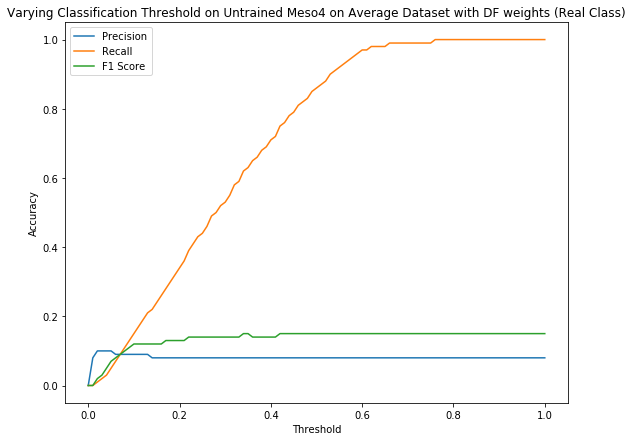

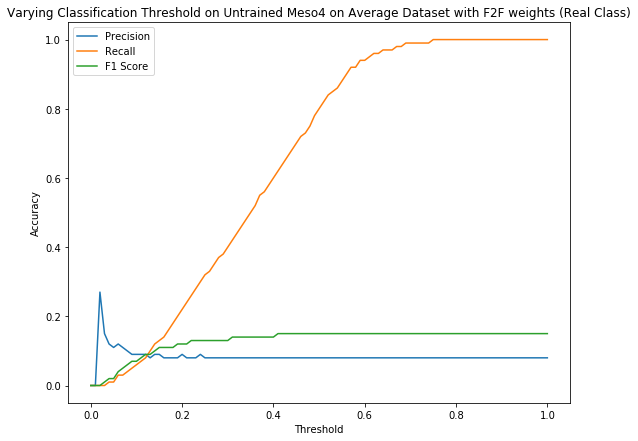

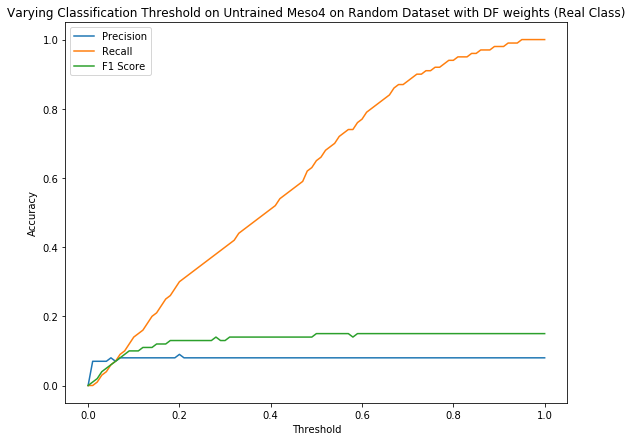

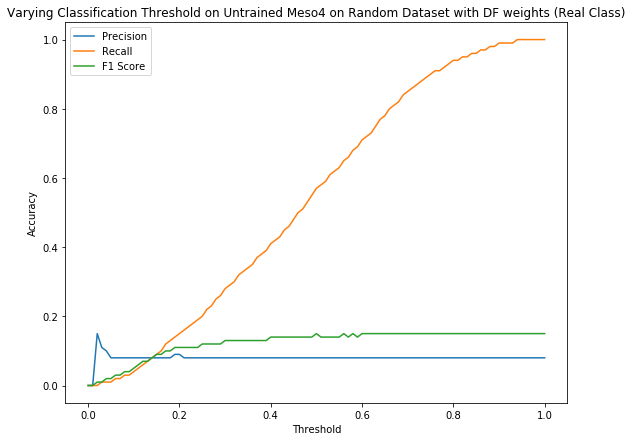

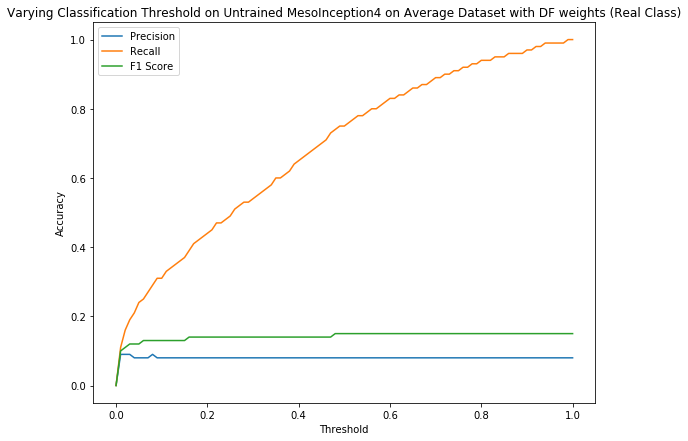

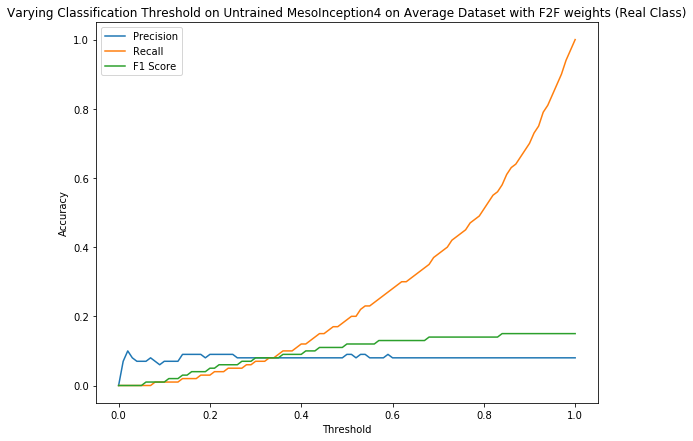

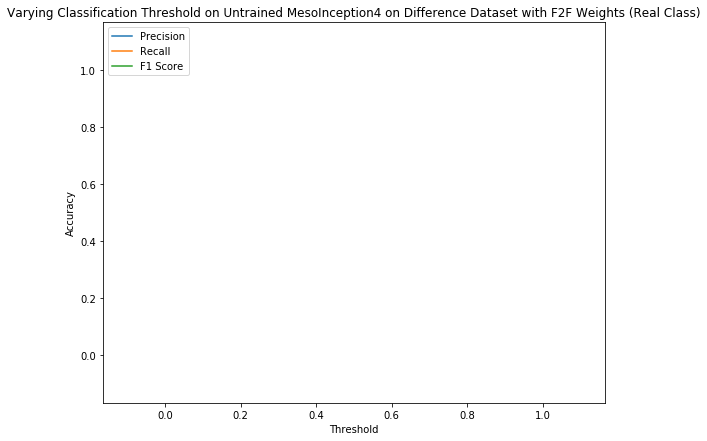

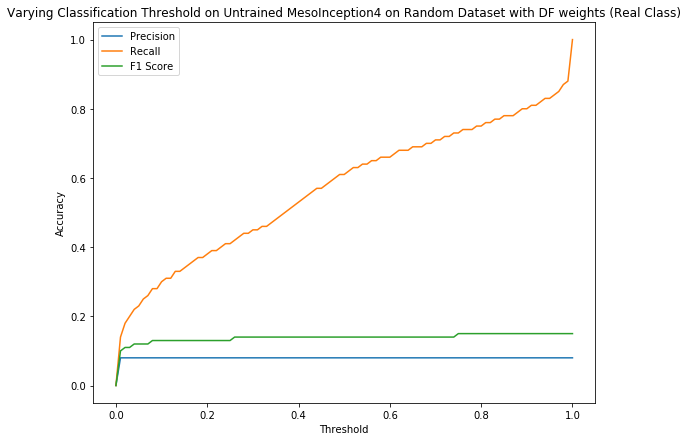

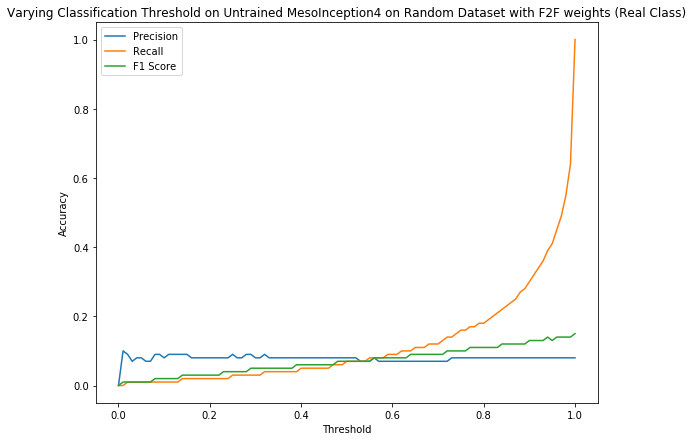

In [159]:
files = []
file1 = ("Untrained_Meso4_on_avg_with_DF_summary.txt", "Varying Classification Threshold on Untrained Meso4 on Average Dataset with DF weights (Real Class)")
file2 = ("Untrained_Meso4_on_avg_with_F2F_summary.txt", "Varying Classification Threshold on Untrained Meso4 on Average Dataset with F2F weights (Real Class)")
file3 = ("Untrained_Meso4_on_rnd_with_DF_summary.txt", "Varying Classification Threshold on Untrained Meso4 on Random Dataset with DF weights (Real Class)")
file4 = ("Untrained_Meso4_on_rnd_with_F2F_summary.txt", "Varying Classification Threshold on Untrained Meso4 on Random Dataset with DF weights (Real Class)")
file5 = ("Untrained_MesoInception4_on_avg_with_DF_summary.txt", "Varying Classification Threshold on Untrained MesoInception4 on Average Dataset with DF weights (Real Class)")
file6 = ("Untrained_MesoInception4_on_avg_with_F2F_summary.txt", "Varying Classification Threshold on Untrained MesoInception4 on Average Dataset with F2F weights (Real Class)")
file7 = ("Untrained_MesoInception4_on_diff_with_F2F_summary.txt", "Varying Classification Threshold on Untrained MesoInception4 on Difference Dataset with F2F Weights (Real Class)")
file8 = ("Untrained_MesoInception4_on_rnd_with_DF_summary.txt", "Varying Classification Threshold on Untrained MesoInception4 on Random Dataset with DF weights (Real Class)")
file9 = ("Untrained_MesoInception4_on_rnd_with_F2F_summary.txt", "Varying Classification Threshold on Untrained MesoInception4 on Random Dataset with F2F weights (Real Class)")

files = [file1, file2,file3,file4, file5, file6, file7, file8, file9]

for file in files:
    thresholds, precisions, recalls, f1_scores =  extract_data(file[0])
    plot_data(file[0], thresholds, precisions, recalls, f1_scores, file[1])